In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
print(len(train_data), len(test_data))

8982 2246


In [4]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
train_labels[10]

3

In [6]:
#keras를 이용한 방법
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

X_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

[과제]
 - 모델 구성
 - model compile
 - 훈련 검증 : 1000개 샘플을 검증 세트로 사용
 - 학습 : epochs = 20, batch_size=512
 - 훈련과정 시각화
 - 적합한 epoch 확인

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
x_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 27ms/step - loss: 2.6070 - accuracy: 0.5278 - val_loss: 1.7255 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 1.4211 - accuracy: 0.7026 - val_loss: 1.3139 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0530 - accuracy: 0.7744 - val_loss: 1.1505 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8343 - accuracy: 0.8250 - val_loss: 1.0512 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6668 - accuracy: 0.8613 - val_loss: 0.9774 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5366 - accuracy: 0.8877 - val_loss: 0.9447 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4272 - accuracy: 0.9103 - val_loss: 0.9190 - val_accuracy: 0.7980
Epoch 8/20
16

In [15]:
import matplotlib.pyplot as plt

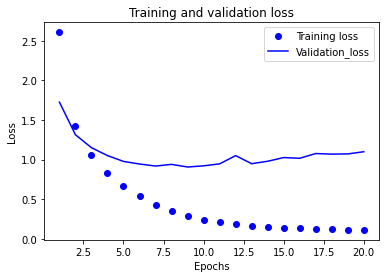

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

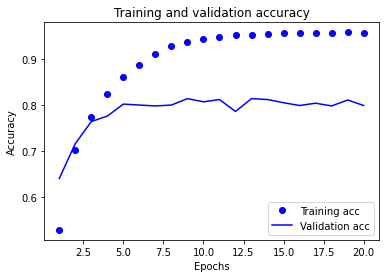

In [17]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 25ms/step - loss: 2.5262 - accuracy: 0.5484 - val_loss: 1.6692 - val_accuracy: 0.6480
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 1.3753 - accuracy: 0.7119 - val_loss: 1.2669 - val_accuracy: 0.7290
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 1.0289 - accuracy: 0.7760 - val_loss: 1.1091 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 0s 11ms/step - loss: 0.8109 - accuracy: 0.8250 - val_loss: 1.0159 - val_accuracy: 0.7910
Epoch 5/9
16/16 [==============================] - 0s 12ms/step - loss: 0.6455 - accuracy: 0.8634 - val_loss: 0.9806 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 0s 12ms/step - loss: 0.5170 - accuracy: 0.8941 - val_loss: 0.9284 - val_accuracy: 0.7910
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4225 - accuracy: 0.9105 - val_loss: 0.9020 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

In [20]:
results

[0.9735190272331238, 0.7804986834526062]

In [21]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19145146927871773